**SAM ALIM RAMADHAN**

**1103210236**

**TK-45-05**

**Lecture 2**

**Decision Tree & KNN**

**Iris Dataset**

**Import Modul yang diperlukan**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

**Muat Dataset**

In [61]:
iris = load_iris()
X = iris.data
y = iris.target

**Memisahkan Train Data dan Test Data**

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Membuat Model Decision Tree**

In [63]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

**Membuat Prediksi Model**

In [64]:
dt_pred = dt_classifier.predict(X_test)

**Menghitung Accuracy**

In [65]:
dt_accuracy = accuracy_score(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 1.0


**Confusion Matrix Decision Tree**

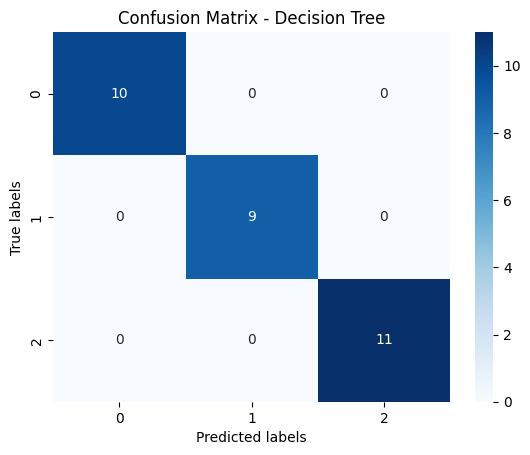

In [66]:
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

**Visualisasi Decision Tree**

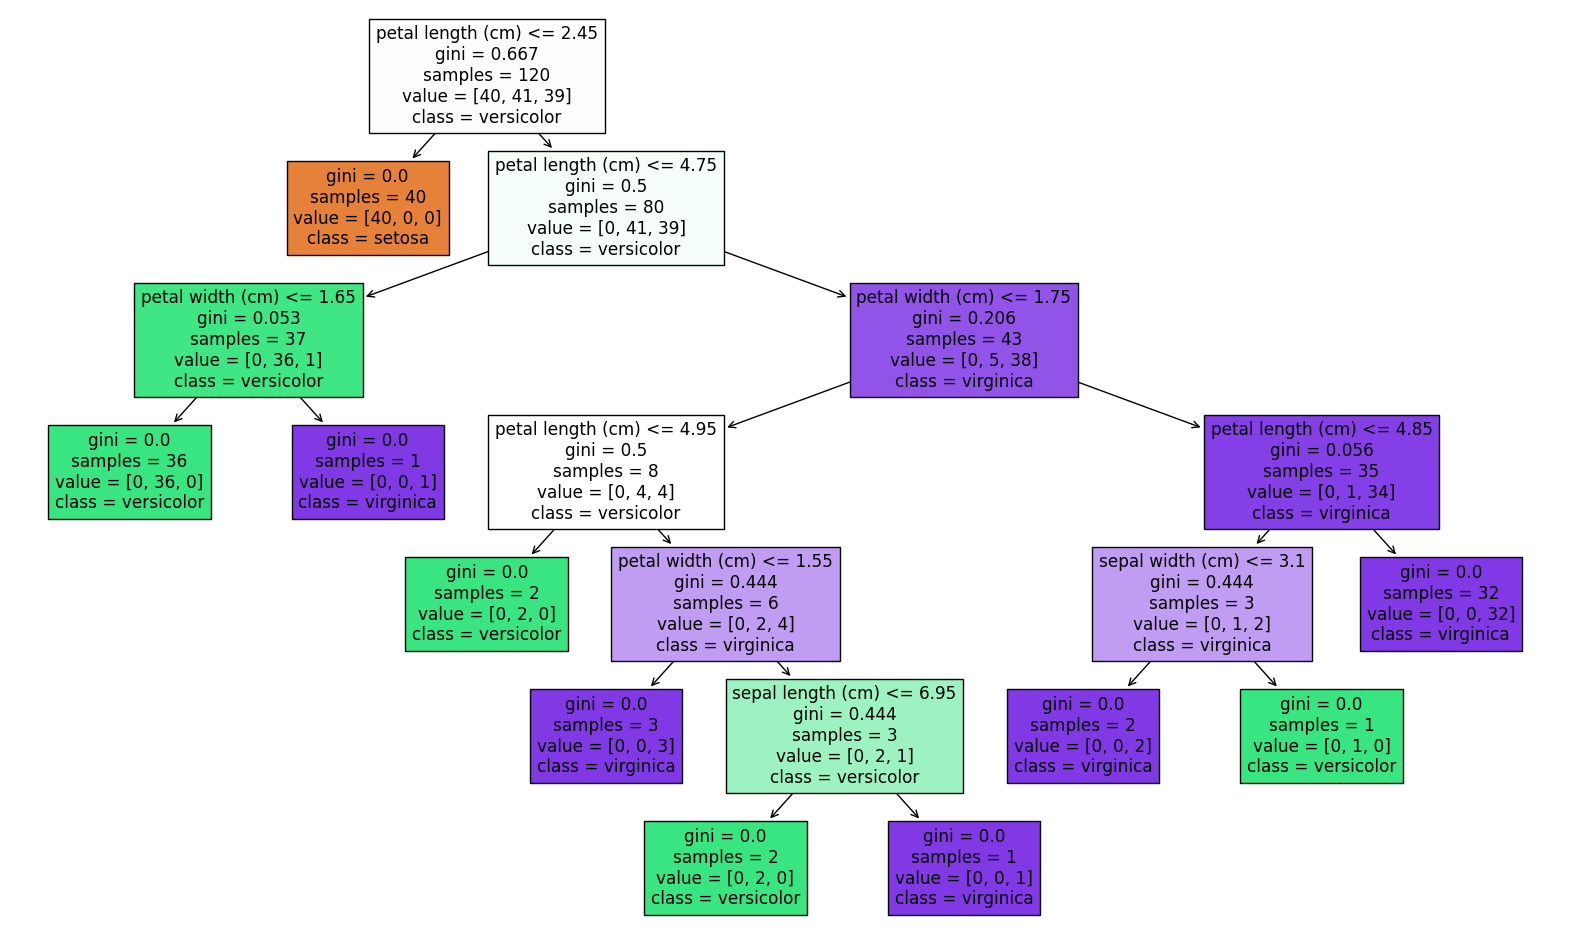

In [67]:
plt.figure(figsize=(20, 12))
plot_tree(dt_classifier, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

**Membuat Model KNN**

In [68]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

**Membuat Prediksi KNN**

In [69]:
knn_pred = knn_classifier.predict(X_test)

**Menghitung Accuracy**

In [70]:
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_accuracy)

KNN Accuracy: 1.0


**Confusion Matrix KNN**

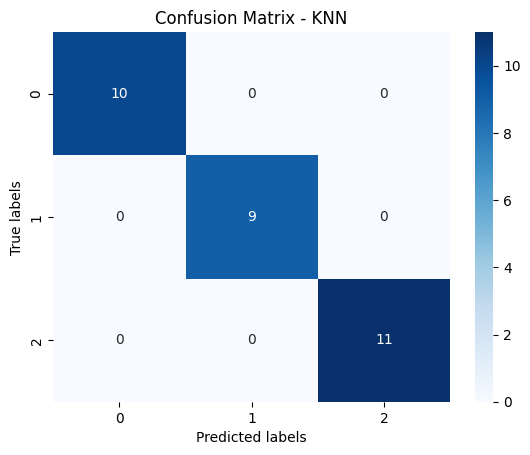

In [71]:
knn_cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')
plt.show()

**Mendapatkan Prediksi Probabilitas dan Konversi ke Dataframe**

In [72]:
knn_probs = knn_classifier.predict_proba(X_test)
knn_probs_df = pd.DataFrame(knn_probs, columns=iris.target_names)

**Tambah Kolom dengan Kelas Actual**

In [73]:
knn_probs_df['Actual'] = iris.target_names[y_test]

**Plot Distribusi**

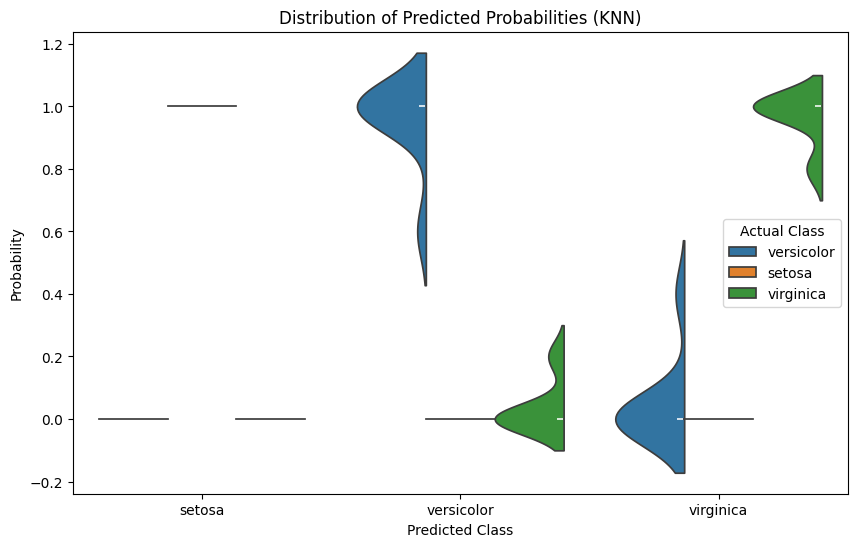

In [74]:
knn_probs_df_melt = knn_probs_df.melt(id_vars='Actual', var_name='Predicted', value_name='Probability')
plt.figure(figsize=(10, 6))
sns.violinplot(x='Predicted', y='Probability', hue='Actual', data=knn_probs_df_melt, split=True)
plt.title('Distribution of Predicted Probabilities (KNN)')
plt.xlabel('Predicted Class')
plt.ylabel('Probability')
plt.legend(title='Actual Class')
plt.show()